## RDKit: Simple Visualization of Molecules in Argonne COVID19 LIT Molecule Dataset

The LIT dataset is a set of molecules that have been identified as potential small molecule inhibitors of
various coronaviruses.

See documentation at for more details on the dataset and methodology.


In [39]:
import pandas as pd

# def choose_identifier(x):
#     # Use pubchem if available, otherwise use LIT-X
#     if x['pubchem_id']: return x['pubchem_id']
#     else: return x['identifier']

df = pd.read_csv('./data/LIT.csv')
cols = ['identifier','canonical_smiles']
df_out = df[cols]
#df['identifier'] = df.apply(choose_identifier, axis=1)
df_out['dataset_name'] = "LIT"
df_out = df_out[["dataset_name","identifier","canonical_smiles"]]
df_out.to_csv('test.csv')

/Users/ben/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [37]:
df_out.set_index('dataset_name').to_csv('test.csv')

In [17]:
df.head()

molecule identifier       virus                  reference  \
0    Remdesivir      LIT-1  SARS-CoV-2  10.1038/s41422-020-0282-0   
1   Chloroquine      LIT-2  SARS-CoV-2  10.1038/s41422-020-0282-0   
2  Nitazoxanide      LIT-3  SARS-CoV-2  10.1038/s41422-020-0282-0   
3    Nafamostat      LIT-4  SARS-CoV-2  10.1038/s41422-020-0282-0   
4   penciclovir      LIT-5  SARS-CoV-2  10.1038/s41422-020-0282-0   

           type                                     pubchem_smiles  \
0  experimental  CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=...   
1  experimental             CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl   
2  experimental    CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]   
3  experimental  C1=CC(=CC=C1C(=O)OC2=CC3=C(C=C2)C=C(C=C3)C(=N)...   
4  experimental                   C1=NC2=C(N1CCC(CO)CO)N=C(NC2=O)N   

                                    canonical_smiles   pubchem_id  \
0  CCC(COC(=O)C(NP(=O)(Oc1ccccc1)OCC1OC(C(C1O)O)(...  121304016.0   
1                  CCN(CCCC(Nc1ccnc2c1ccc(c2)Cl)C)CC       2719.0   
2         CC(=O)Oc1ccccc1C(=O)Nc1ncc(s1)[N+](=O)[O-]      41684.0   
3    NC(=Nc1ccc(cc1)C(=O)Oc1ccc2c(c1)ccc(c2)C(=N)N)N       4413.0   
4                     OCC(CCn1cnc2c1nc(N)[nH]c2=O)CO  135398748.0   

   similarity_calculated  release  
0                    1.0      0.2  
1                    1.0      0.2  
2                    1.0      0.2  
3                    1.0      0.2  
4                    1.0      0.2

In [11]:
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

In [12]:
df = pd.read_csv('./data/LIT.csv')
df.head(4)

molecule       virus                  reference          type  \
0    Remdesivir  SARS-CoV-2  10.1038/s41422-020-0282-0  experimental   
1   Chloroquine  SARS-CoV-2  10.1038/s41422-020-0282-0  experimental   
2  Nitazoxanide  SARS-CoV-2  10.1038/s41422-020-0282-0  experimental   
3    Nafamostat  SARS-CoV-2  10.1038/s41422-020-0282-0  experimental   

                                      pubchem_smiles  \
0  CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=...   
1             CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl   
2    CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]   
3  C1=CC(=CC=C1C(=O)OC2=CC3=C(C=C2)C=C(C=C3)C(=N)...   

                                    canonical_smiles   pubchem_id  \
0  CCC(COC(=O)C(NP(=O)(Oc1ccccc1)OCC1OC(C(C1O)O)(...  121304016.0   
1                  CCN(CCCC(Nc1ccnc2c1ccc(c2)Cl)C)CC       2719.0   
2         CC(=O)Oc1ccccc1C(=O)Nc1ncc(s1)[N+](=O)[O-]      41684.0   
3    NC(=Nc1ccc(cc1)C(=O)Oc1ccc2c(c1)ccc(c2)C(=N)N)N       4413.0   

   similarity_calculated  release  
0                    1.0      0.2  
1                    1.0      0.2  
2                    1.0      0.2  
3                    1.0      0.2

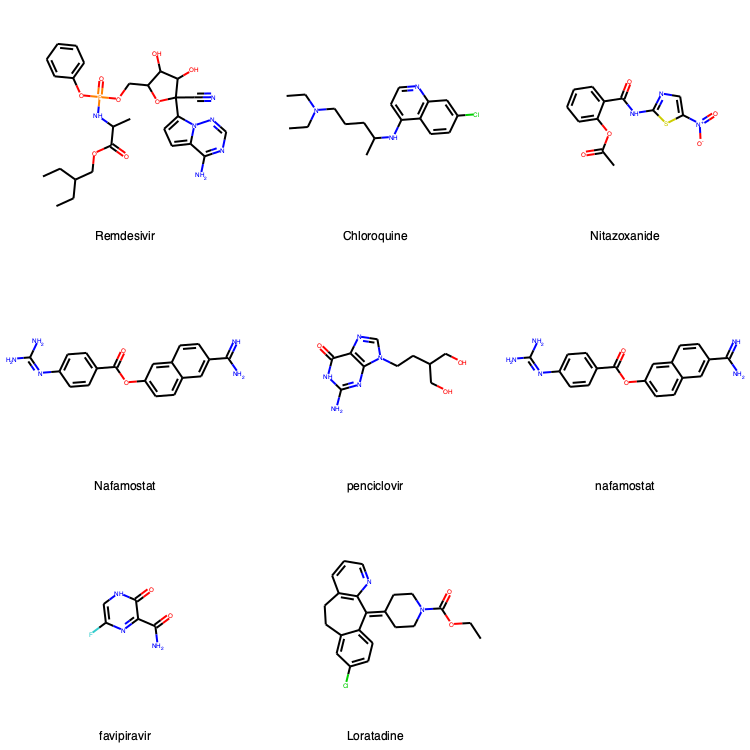

In [13]:
n_mols = 8
ms = [Chem.MolFromSmiles(sm) for sm in df['canonical_smiles'][0:n_mols]]
Chem.Draw.MolsToGridImage(ms,molsPerRow=3, subImgSize=(250, 250), 
                          legends=["{}".format(x['molecule']) 
                                   for i, x in df[0:n_mols].iterrows()])